In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import json

In [2]:
with open('redditdata_combined.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Assuming the JSON has a structure like {'flair': {flair_name: {post_id: post_data}}}
# Flatten the nested structure
records = []
for flair, posts in data.get('flair', {}).items():
    for post_id, post_info in posts.items():
        record = {
            'post_id': post_id,
            'flair': flair,
            'title': post_info.get('title', ''),
            'text_body': post_info.get('text_body', ''),
            'author': post_info.get('author', ''),
            'score': post_info.get('score', 0),
            'num_comments': post_info.get('num_comments', 0)
        }
        records.append(record)

# Create a DataFrame
df = pd.DataFrame(records)
df

,post_id,flair,title,text_body,author,score,num_comments
0,1jwqkjk,Content Warning: Suicidal Thoughts / Self Harm,Struggling lately,I’m 16 and recently I’ve been feeling really d...,zkkkkkkkkk2008,1,1
1,1jwo3c6,Content Warning: Suicidal Thoughts / Self Harm,Went to hospital with suicidal thoughts,So I went to the hospital with an active plan ...,Frankenstien_Sloth,1,14
2,1jwnf53,Content Warning: Suicidal Thoughts / Self Harm,To the people I love,"**To the People I Love,**\n\nI’ve been thinkin...",Prestigious_Duck08,2,5
3,1jwnbsg,Content Warning: Suicidal Thoughts / Self Harm,Am i traumatized because I have no friends or ...,This is just a question I have been wondering ...,Routine-Pound-591,1,5
4,1jwmhvs,Content Warning: Suicidal Thoughts / Self Harm,I’m reaching breaking point,I am lost. I am broken. I am trapped \n\nFor t...,Difficult_Body_1707,1,2
...,...,...,...,...,...,...,...
1177,1jl64w7,Advice Wanted,Went from KV to just V last night and felt... ...,I was a little afraid this would be the case. ...,thesuspiciouszed,10,4
1178,1jl3tzz,Advice Wanted,I am depressed all the time and people start n...,I can't lie to myself that's I am ok . I tried...,Electronic-Ad3532,15,3
1179,1jixod4,Advice Wanted,Does it get better after high school or is it ...,I'm about to graduate from high school and all...,RickyDickyPubicBalls,14,23
1180,1jyv17t,TW: Abuse,I finally understood genuinely nobody cares ab...,I have been emotionally & physically abused si...,trynamakeitty,4,2


In [3]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words and word not in string.punctuation]
    return ' '.join(tokens)

# Apply preprocessing
df['clean_title'] = df['title'].apply(preprocess_text)
df['clean_text_body'] = df['text_body'].apply(preprocess_text)

In [4]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['clean_title'] + ' ' + df['clean_text_body'])


In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())


In [6]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(X_pca)


In [7]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, df['cluster'])
print(f"Silhouette Score: {sil_score}")


Silhouette Score: 0.013485131491115736


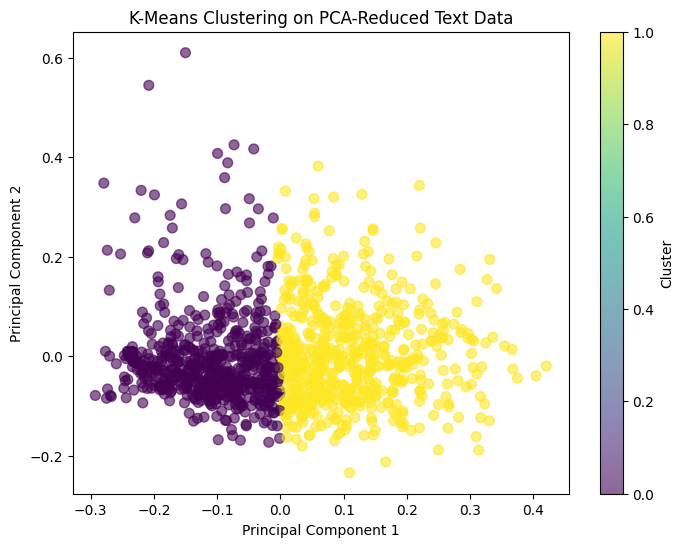

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis', s=50, alpha=0.6)
plt.title('K-Means Clustering on PCA-Reduced Text Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
